In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
prices= df['Open'].values
prices

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [9]:
prices = prices.reshape(-1,1)
prices

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
prices_scaled = scaler.fit_transform(prices)
prices_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
# Select the first train_size elements from prices_scaled to create the training data
train_data = prices_scaled[0:train_size]
# Select the remaining elements from prices_scaled to create the test data
test_data = prices_scaled[train_size:len(prices_scaled)]

In [12]:
# Function to create X and y datasets from time series data
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
         # For each iteration, append a slice of the dataset starting from index i 
        # up to (i + time_step) to X. This creates the input sequences.
        X.append(dataset[i:(i+time_step), 0])
        
        # Append the next value in the dataset after the input sequence 
        # (i + time_step) to y. This represents the target value.
        y.append(dataset[i+ time_step, 0])
            # Convert the lists to numpy arrays and return them
    return np.array(X), np.array(y)

In [15]:
time_step=60 # each input sequence will consist of 60 consecutive data points.

x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [16]:
# Reshape the input data to be 3D (batch_size(no of samples in data), time_step(no of timestep in each input sequence), features)
#Since we're dealing with univariate time series data (only one feature, the price in this case)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)#where x_train contains input sequences of 60 consecutive data points, and y_train contains the corresponding output values.
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
#build RNN model
model = Sequential([ #50neurons
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50), #by default returns last output
    Dense(units=1) #It's a standard output layer for regression tasks, where the model predicts a continuous value.
])

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
#compile model
model.compile(
    loss="mean_squared_error", #commonly used for regression probs
    optimizer='adam',
    #This parameter specifies the optimizer to use for updating the weights of the neural network during training. 'adam' refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm that is well-suited for deep learning tasks. Adam dynamically adjusts the learning rate during training based on the gradients of the loss function with respect to the parameters.
)

In [23]:
#train the model
#x_train: The input data for training, which consists of input sequences.
#y_train: The target data for training, which consists of corresponding output values.
model.fit(x_train, y_train, epochs=100, batch_size=64)
# It defines how many samples of input data will be fed into the model at once during training. Here, the batch size is set to 64, meaning that the model will update its weights after processing 64 samples.

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 0.1076
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0133
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0041
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0020
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0019
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0013
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0016
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0014
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0012
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0015
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0012
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - lo

In [25]:
#predictions 
y_pred=model.predict(x_test)#The model uses its learned parameters to make predictions on the test data.

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


In [26]:
# Inverse scaling to get actual prices
#The inverse scaling is necessary because during preprocessing, the original data was scaled to a range that is more suitable for training the neural network. However, when making predictions and evaluating the model, it's essential to transform the predicted values back to their original scale for meaningful interpretation and comparison with the actual target values.
y_pred = scaler.inverse_transform(y_pred)
y_test =scaler.inverse_transform([y_test])

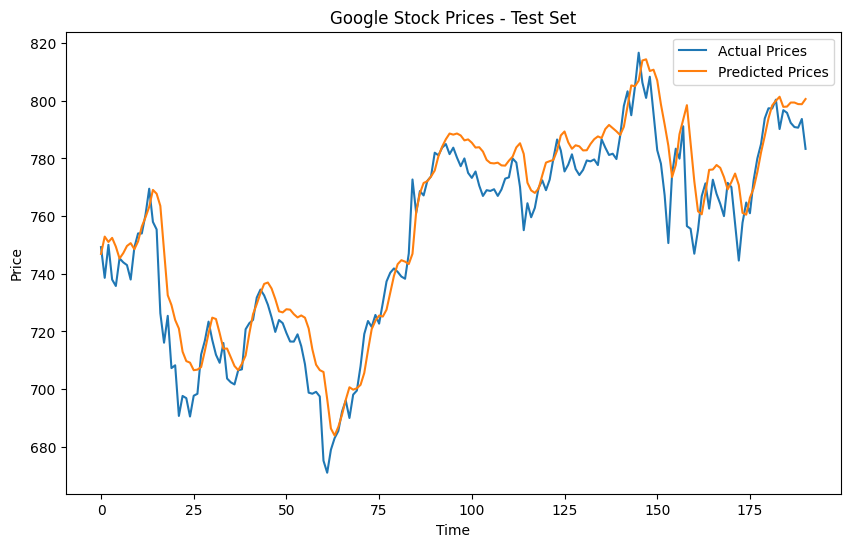

In [27]:
# Plot the test predictions vs. actual prices
plt.figure(figsize=(10,6))
plt.plot(y_test.flatten(), label='Actual Prices')
plt.plot(y_pred.flatten(), label='Predicted Prices')
plt.title('Google Stock Prices - Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
#.flatten() is used to convert the 2D array to a 1D array,